## Jupyther Notebook for Clustering Analysis of the Digits Data Set ##

In [50]:
"""


by Annette Witt, Max-Planck-Institute for Dynamics and Self-Organization, Germany, 2018
===========================================================

A demo of different clustering algorithms 
presented for the handwritten digits data set
===========================================================

In this example we compare three clustering techniques.

As cluster quality metric we use the overall success rate.

We also investigate the different run-times.
"""
print(__doc__)




by Annette Witt, Max-Planck-Institute for Dynamics and Self-Organization, Germany, 2018

A demo of different clustering algorithms 
presented for the handwritten digits data set

In this example we compare three clustering techniques.

As cluster quality metric we use the overall success rate.

We also investigate the different run-times.



Let's begin with loading some packages

In [51]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.mixture import GMM

And let's also load the ** digits data set ** and let's also  rescale  the data set.

In [52]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
data = digits.data


n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target


print(" n_digits: %d, \n n_samples: %d, \n n_features: %d"
      % (n_digits, n_samples, n_features))


 n_digits: 10, 
 n_samples: 1797, 
 n_features: 64


Now we use the ** plot_gallery function** which is introduced here:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [69]:
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from numpy.random import RandomState

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (8, 8)
rng = RandomState(0)



###############################################################################
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
#    plt.sup
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

   


and plot the first 10 digits of the data set.

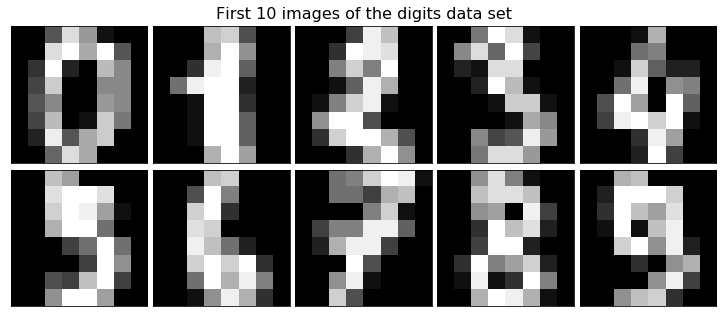

In [70]:
plot_gallery("First 10 images of the digits data set", data[:n_components])

Now we define a function which computes the ** overall sucess rate **. 
Be aware of that in case of non-supervised learning it is just an approximation.


In [53]:

    
def approx_OSR(y_target, y_predicted):
    """Overall success rate (naive implementation, which can be wrong (as two predicted classes can get assigned to a single target class))
        Args:
            y_target(np.ndarray): n*1 matrix Ground truth labels
            y_predicted(np.ndarray): n*1 matrix Predicted clusters
        Returns:
            float: Overall success rate
    """

    import numpy as np
    
   
    correctly_predicted=0

    for cluster in np.unique(y_predicted):
        w=np.where(y_predicted == cluster)[0]
        z=np.bincount(y_target[w])
        correctly_predicted=correctly_predicted+max(z)
    
    return correctly_predicted/np.size(y_target)



# K-Means Clustering #
We start with the ** k-means clustering** algorithm, will compute and vizualize the confusion matrix and will compute the overall success rate and the runtime. 

run time: 0.31242990493774414
OSR: 0.7941012799109627


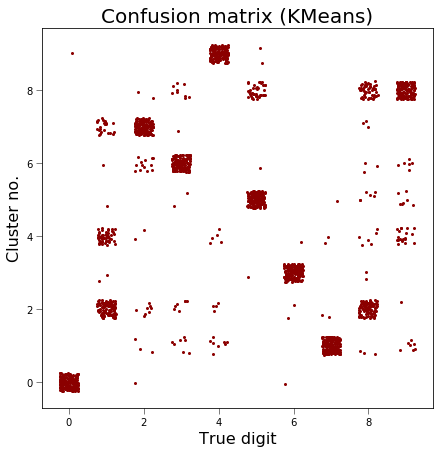

In [86]:


kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
t0 = time()
kmeans.fit(data)
print("run time:", time() - t0)

ps=approx_OSR(labels,kmeans.labels_)
print("OSR:",ps )

scatterx = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)
scattery = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)

fig = plt.figure(figsize=(7,7))
plt.plot(labels+scatterx,kmeans.labels_+scattery,'o', markersize=2, color='darkred')
plt.xlabel('True digit', fontsize=16)
plt.ylabel('Cluster no.', fontsize=16)
plt.title('Confusion matrix (KMeans)', fontsize=20)
plt.tick_params(axis='x', colors='black', direction='out', length=6, width=0.5)
plt.tick_params(axis='y', colors='black', direction='out', length=6, width=0.5)
plt.show()



*The above graphic vizualizes the confuxion matrix. Each point corresponds to one element of the data set (i.e., to one image of a digit). The true (labeled) digits are given on the abscissa. The predicted digits are shown along the ordinate. In order to avoid overprinting, a small noise is added to each point. In case of a perfect algorithm the true and the predicted digits were identical, i.e., all points were located along the diagonal. As k-means is a non-supervised clustering algorithm, the best possible outcome is a one-to-one match of true and predicted digits. There is however a significant percentage of missclassified digits (the small groups of points) which can be quantifid by the overall success rate.* 

# Softmax Regression#
Let's now try **softmax regression** as an alternative to k-means. Let's look again at the confusion matrix and the  OSR. We use the standard parameter for the regularization (L2 norm and C=1)

run time: 0.18573927879333496
Overall success rate: 1.0


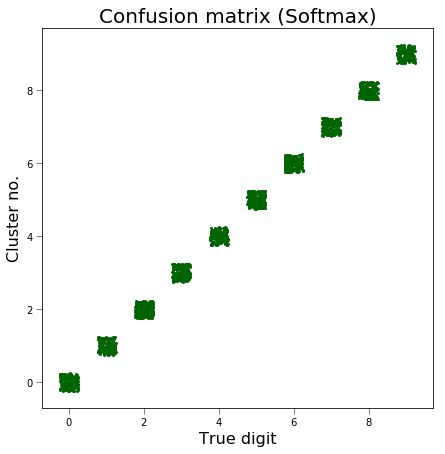

In [87]:
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1)

t0 = time()
softmax_reg.fit(data,labels)
predicted_digits=softmax_reg.predict(data)
ps=approx_OSR(labels,predicted_digits)
print("run time:", time() - t0)
print("Overall success rate:",ps )

scatterx = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)
scattery = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)

fig = plt.figure(figsize=(7,7))
plt.plot(labels+scatterx,predicted_digits+scattery,'o', markersize=2, color='darkgreen')
plt.xlabel('True digit', fontsize=16)
plt.ylabel('Cluster no.', fontsize=16)
plt.title('Confusion matrix (Softmax)', fontsize=20)
plt.tick_params(axis='x', colors='black', direction='out', length=6, width=0.5)
plt.tick_params(axis='y', colors='black', direction='out', length=6, width=0.5)
plt.show()

We find, that *softmax regression leads to better results*  (more correctly predicted digits) than K-means clustering. The overall success rate is zero, i.e., there are no missclassifications. Feel free to use other values of tha parameter _C_ (inverse of the regularization strength)

# Gaussian mixture models#
Now we will apply ** Gaussian mixture models ** and investigate again run time and OSR.

OVERALL SUCCESS RATE (GMM)
run time: 0.8586666584014893
Overall success rate: 0.798553144129104


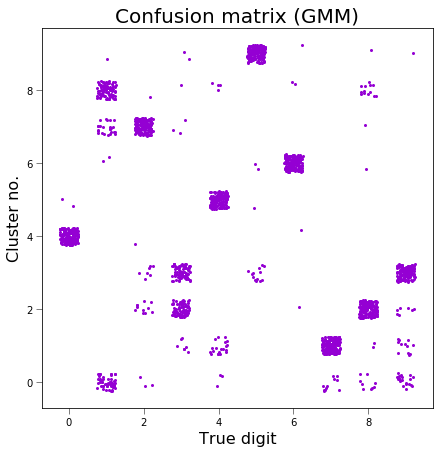

In [88]:
from sklearn import mixture

print("OVERALL SUCCESS RATE (GMM)")

t0 = time()

gmm = mixture.GaussianMixture(n_components=10)
gmm.fit(data)
predicted_digits=gmm.predict(data)
ps=approx_OSR(labels,predicted_digits)
print("run time:", time() - t0)
print("Overall success rate:",ps )

scatterx = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)
scattery = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)

fig = plt.figure(figsize=(7,7))
plt.plot(labels+scatterx,predicted_digits+scattery,'o', markersize=2, color='darkviolet')
plt.xlabel('True digit', fontsize=16)
plt.ylabel('Cluster no.', fontsize=16)
plt.title('Confusion matrix (GMM)', fontsize=20)
plt.tick_params(axis='x', colors='black', direction='out', length=6, width=0.5)
plt.tick_params(axis='y', colors='black', direction='out', length=6, width=0.5)
plt.show()

The results are similar to KMeans and weaker compared to softmax regression.

## Support Vector Machines##
We now will use ** support vector machines ** as clustering algorithms.
We use SVMs that have a * linear kernel *.

run time: 0.12499737739562988
Overall success rate: 1.0


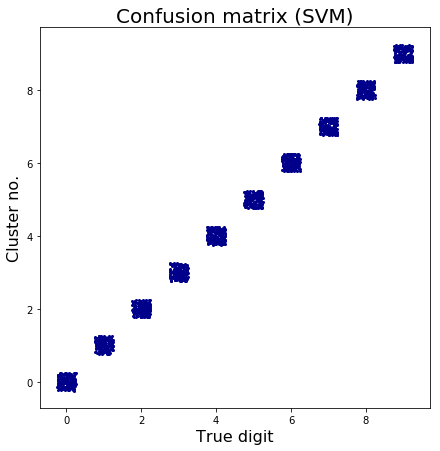

In [89]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
t0 = time()
SVM = svm.SVC(kernel='linear', C=C)
SVM.fit(data,labels)
predicted_digits=SVM.predict(data)
cm=confusion_matrix(labels, predicted_digits)
ps=approx_OSR(labels,predicted_digits)

print("run time:", time() - t0)
print("Overall success rate:",ps )

scatterx = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)
scattery = 0.49*(np.random.uniform(0,1,labels.shape)-0.5)

fig = plt.figure(figsize=(7,7))
plt.plot(labels+scatterx,predicted_digits+scattery,'o', markersize=2, color='darkblue')
plt.xlabel('True digit', fontsize=16)
plt.ylabel('Cluster no.', fontsize=16)
plt.title('Confusion matrix (SVM)', fontsize=20)
plt.tick_params(axis='x', colors='black', direction='out', length=6, width=0.5)
plt.tick_params(axis='y', colors='black', direction='out', length=6, width=0.5)

plt.show()

In ** summary **, we found that support vector machines and softmax regression led to perfect data set predictions, i.e., the overall success rate is 1.0. The runtimes were short compared to the other two techniques. The overall success rate of KMeans and Gaussian Mixture models is much lower (0.79 and 0.83).

We have **not considered overfitting**. We should split our hand-written digits into a training and a test data set ... please look at the other scripts in this repository.
We also have not tested different regularizations ...